In [5]:
#import data
df=pd.read_csv("C:\\Users\\HeyMath\\Downloads\\comcast.csv")

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [20]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [22]:
#Cleanup the Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [23]:
#Covert Object(Str) to Datetime 
df['Date_month_year']=pd.to_datetime(df["Date_month_year"])

In [43]:
df['Day']=df['Date_month_year'].dt.day
df['Month']=df['Date_month_year'].dt.month_name()
df['Year']=df['Date_month_year'].dt.year
df['week_day'] = df['Date_month_year'].dt.dayofweek
week = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['week_day'] = df['week_day'].map(week)

In [48]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,week_day,Year
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,April,Wed,2015
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,August,Tue,2015
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,April,Sat,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,July,Sun,2015
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,May,Tue,2015


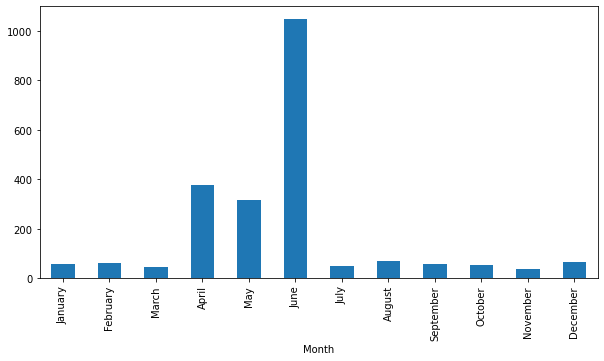

In [107]:
#Trend at monthly granularity levels

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df.groupby('Month').size().reindex(new_order).plot.bar(figsize=(10,5))

#June month has highest number of Complaints


[Text(0, 0, '206'),
 Text(0, 0, '131'),
 Text(0, 0, '272'),
 Text(0, 0, '68'),
 Text(0, 0, '54'),
 Text(0, 0, '58'),
 Text(0, 0, '65'),
 Text(0, 0, '60'),
 Text(0, 0, '69'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '41'),
 Text(0, 0, '66'),
 Text(0, 0, '225'),
 Text(0, 0, '249'),
 Text(0, 0, '126'),
 Text(0, 0, '90'),
 Text(0, 0, '81'),
 Text(0, 0, '79'),
 Text(0, 0, '87'),
 Text(0, 0, '86'),
 Text(0, 0, '10')]

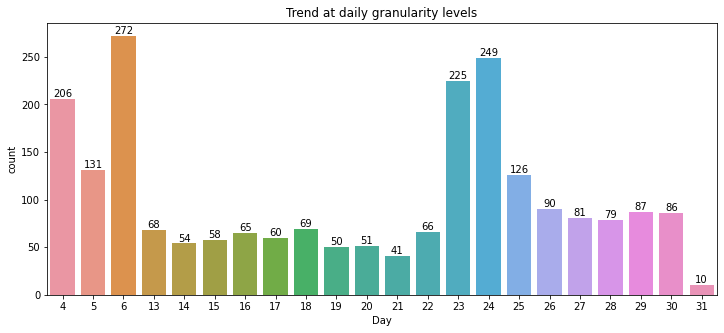

In [119]:
#Trend at daily granularity levels

ad=df.groupby('Day').size()
plt.figure(figsize=(12,5))
Daily_Graph=sns.countplot(x="Day",data=df)
Daily_Graph.set(title="Trend at daily granularity levels")
Daily_Graph.bar_label(container=Daily_Graph.containers[0], labels=ad)

# Maximum complaints(272) received on 6th day of the month

[Text(0, 0, '256'),
 Text(0, 0, '464'),
 Text(0, 0, '441'),
 Text(0, 0, '331'),
 Text(0, 0, '290'),
 Text(0, 0, '214'),
 Text(0, 0, '228')]

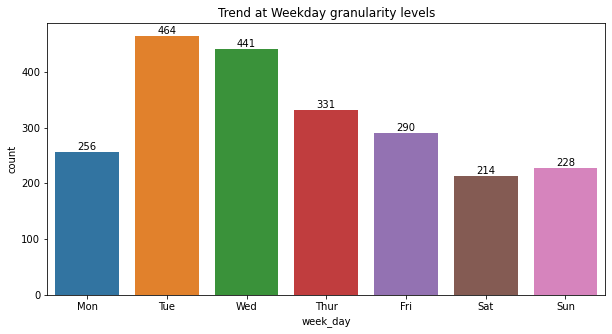

In [133]:
#Trend at Weekday granularity levels
odr=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
lbl=df.groupby('week_day').size().reindex(odr)
plt.figure(figsize=(10,5))
weekgraph=sns.countplot(x='week_day',data=df,order=odr)
weekgraph.set(title='Trend at Weekday granularity levels')
weekgraph.bar_label(container=weekgraph.containers[0], labels=lbl)
#Maximum complaints are received on Tuesday follwed by wednesday

In [142]:
#Creating new column to categorise Open & Pending as "Open" and Closed & Solved as "Closed"

df['New_Status']=['Open' if x == 'Open' or x == 'Pending' else 'Closed' for x in df['Status']]
df[['Ticket #','Status','New_Status']].sample(10)

,Ticket #,Status,New_Status
958,222146,Closed,Closed
276,354359,Open,Open
1412,337000,Solved,Closed
1774,375439,Solved,Closed
981,291385,Solved,Closed
59,342435,Solved,Closed
220,347973,Closed,Closed
1416,218108,Closed,Closed
1663,293685,Open,Open
542,304759,Closed,Closed


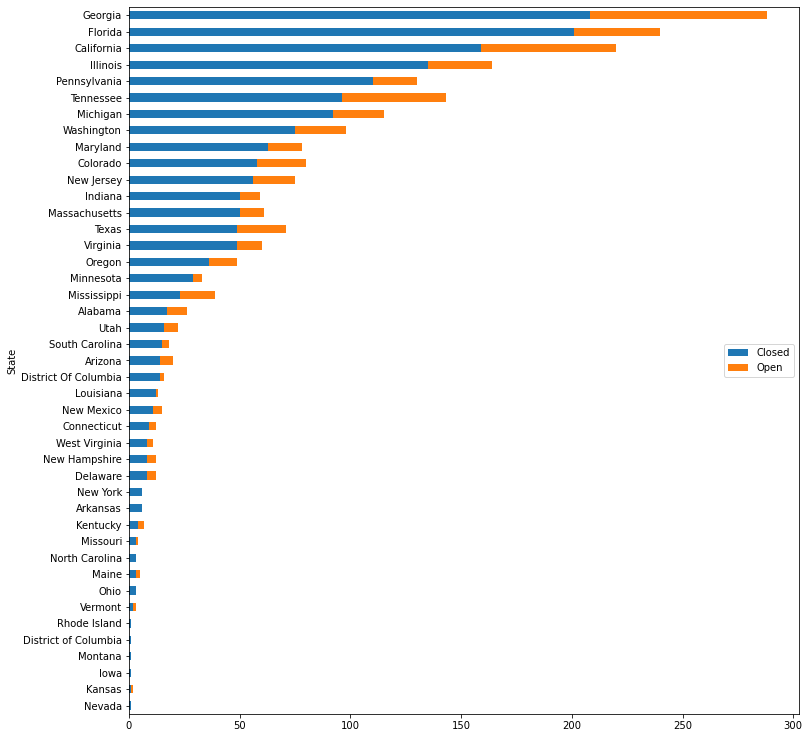

In [168]:
#Stacked bar chart for state wise status of complaints
St_wise=df.groupby(['State','New_Status']).size().unstack().fillna(0)
St_wise.sort_values('Closed',ascending=True).plot.barh(figsize=(12,13), stacked=True).legend(loc='center right')

In [171]:
#state with maximum complaints

df.groupby('State').size().sort_values(ascending=False)[:1]
#Georgia has highest(288) number of complaints


State
Georgia    288
dtype: int64

In [180]:
#State with highest percentage of unresolved complaints
St_wise['Unresolved%']=(St_wise['Open']/St_wise['Open'].sum())*100
St_wise.sort_values('Unresolved%',ascending=False)[:1]
#Georgia has highest(15.46) Unresolved %

New_Status,Closed,Open,Unresolved%
State,,,
Georgia,208.0,80.0,15.473888


In [191]:
# percentage of complaints resolved till date, which were received through the Internet and customer care calls

com_res=df.groupby(['Received Via','New_Status']).size().unstack()
com_res['Resolved%']=(com_res['Closed']/(com_res['Closed'].sum()))*100
com_res

New_Status,Closed,Open,Resolved%
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


In [6]:
### Provide a table with the frequency of complaint types.
df['Customer Complaint'].str.lower().value_counts()

comcast                                                            102
comcast data cap                                                    30
comcast internet                                                    29
comcast data caps                                                   21
comcast billing                                                     18
                                                                  ... 
monthly data caps                                                    1
comcast/xfinity poor service, fraudulent billing and collection      1
lost emails/billing                                                  1
improper billing and non resolution of issues                        1
comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [7]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

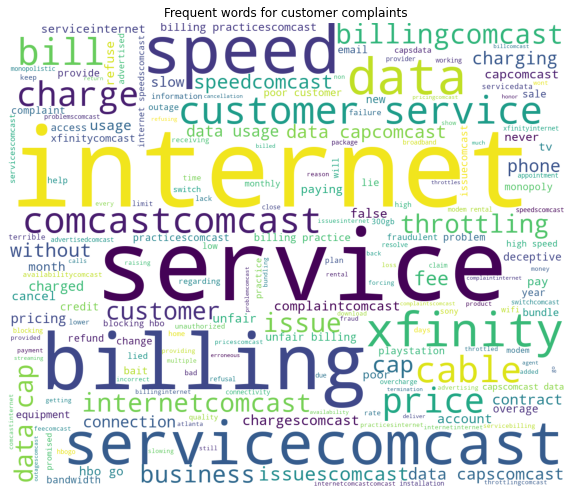

In [8]:
list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

plt.figure(figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()
# Maximum complaints are related to internet, followed by service and billing.